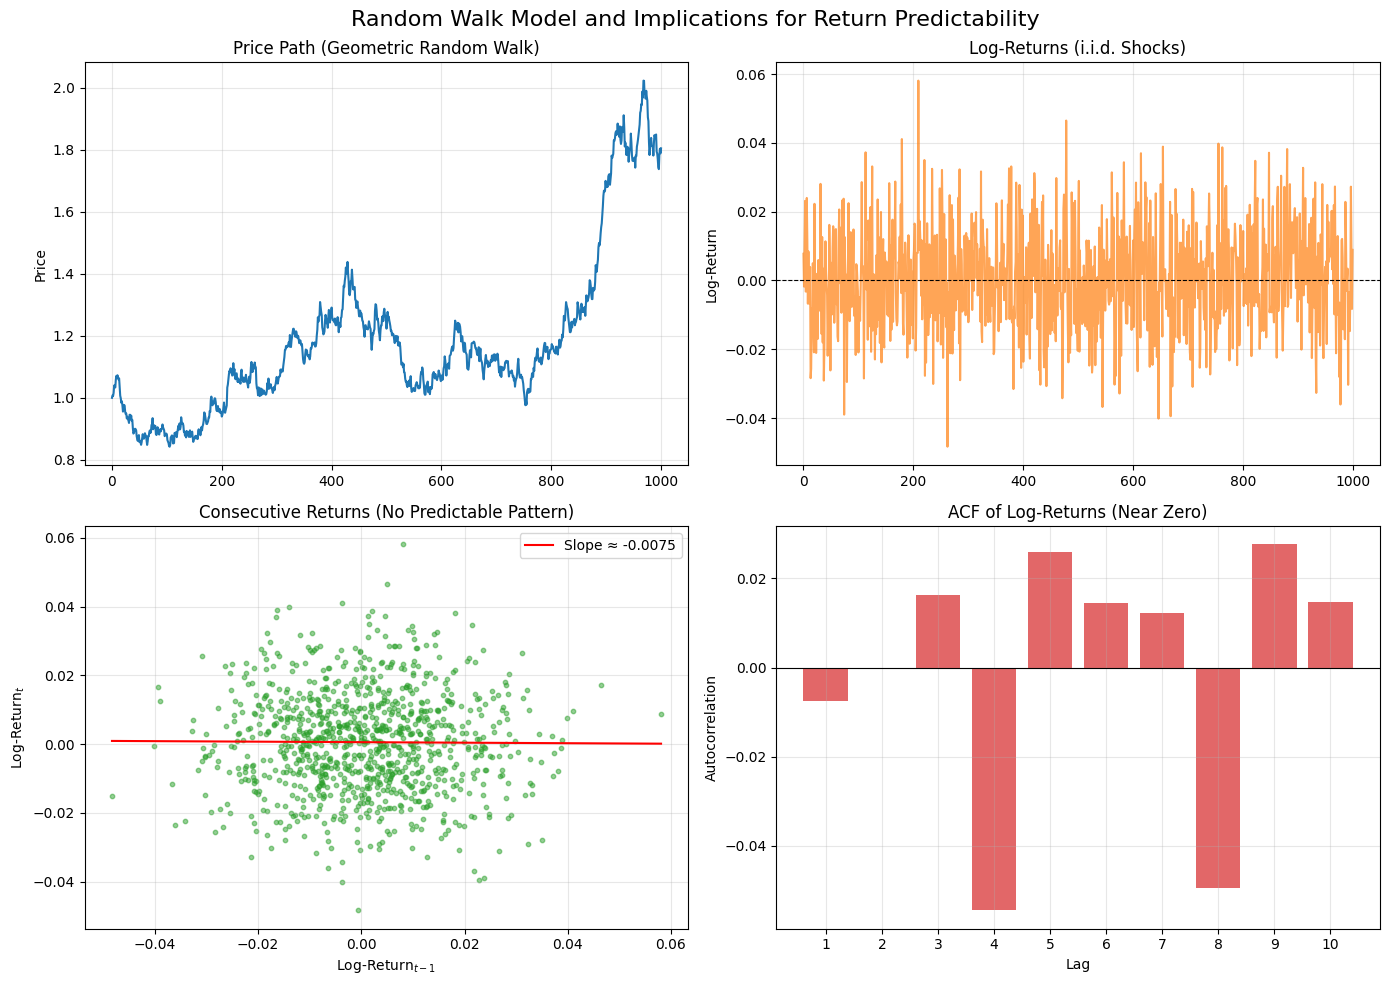

In [47]:
"""
Python & AI for Algorithmic Trading - Review Questions (Part I / Efficient Markets Baseline)
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# =============================================================================
# Question 1
# Define the Efficient Market Hypothesis (EMH) as a baseline model.
# Why does treating EMH as a baseline differ from claiming that no strategy can ever work?
# =============================================================================

# The Efficient Market Hypothesis (EMH) states that asset prices fully reflect all
# available information, implying that excess risk-adjusted returns are not achievable
# using that information alone.
#
# Treating EMH as a baseline model means adopting it as a null hypothesis: we assume
# no predictable edge exists until rigorous evidence proves otherwise. This differs
# from the absolute claim that no strategy can ever work, because the baseline approach
# allows for the possibility of temporary or hard-to-exploit inefficiencies while
# demanding strong out-of-sample, cost-adjusted proof of any claimed edge.

# =============================================================================
# Question 2
# Distinguish weak-form, semi-strong, and strong-form efficiency.
# For each form, describe the information set it assumes is already priced in.
# =============================================================================

# Weak-form: All historical price and volume data are fully reflected in current prices.
# Semi-strong: All publicly available information (prices, news, financial statements,
#   macroeconomic data, etc.) is reflected.
# Strong-form: All information, including private/insider information, is reflected.

# =============================================================================
# Question 3
# Describe a random-walk model for log prices and explain how it implies
# unpredictability of returns. How do simple returns differ from log-returns
# in this context?
# =============================================================================

def simulate_log_random_walk(steps=500, mu=0.0003, sigma=0.015, seed=42):
    """Simulate log-price random walk: log(P_t) = log(P_{t-1}) + ε_t, ε_t ~ N(mu, σ²)."""
    np.random.seed(seed)
    shocks = np.random.normal(loc=mu, scale=sigma, size=steps)
    log_prices = np.cumsum(shocks)
    log_prices = np.insert(log_prices, 0, 0.0)  # log(P_0) = 0
    return log_prices


def compute_returns(log_prices):
    """Compute log-returns and simple returns from log-prices."""
    log_returns = np.diff(log_prices)
    prices = np.exp(log_prices)
    simple_returns = np.diff(prices) / prices[:-1]
    return log_returns, simple_returns, prices


def autocorrelation(returns, lag=1):
    """Sample autocorrelation at given lag."""
    return np.corrcoef(returns[:-lag], returns[lag:])[0, 1]


# Execution and multi-panel visualization
log_prices = simulate_log_random_walk(steps=1000, mu=0.0003, sigma=0.015)
log_returns, simple_returns, prices = compute_returns(log_prices)

# Lagged scatter regression
slope, intercept, r_value, _, _ = linregress(log_returns[:-1], log_returns[1:])

# Autocorrelations up to lag 10
lags = np.arange(1, 11)
acfs = [autocorrelation(log_returns, lag=lag) for lag in lags]

# Four-panel figure illustrating information assimilation and unpredictability
fig = plt.figure(figsize=(14, 10))
fig.suptitle("Random Walk Model and Implications for Return Predictability", fontsize=16)

# 1. Price path – shows all past information assimilated into current price
ax1 = plt.subplot(2, 2, 1)
ax1.plot(prices, color="#1f77b4")
ax1.set_title("Price Path (Geometric Random Walk)")
ax1.set_ylabel("Price")
ax1.grid(True, alpha=0.3)

# 2. Log-returns – appear as white noise
ax2 = plt.subplot(2, 2, 2)
ax2.plot(log_returns, color="#ff7f0e", alpha=0.7)
ax2.axhline(0, color="black", linewidth=0.8, linestyle="--")
ax2.set_title("Log-Returns (i.i.d. Shocks)")
ax2.set_ylabel("Log-Return")
ax2.grid(True, alpha=0.3)

# 3. Scatter of consecutive returns – no linear relationship
ax3 = plt.subplot(2, 2, 3)
ax3.scatter(log_returns[:-1], log_returns[1:], alpha=0.5, s=10, color="#2ca02c")
x_line = np.linspace(log_returns.min(), log_returns.max(), 100)
ax3.plot(x_line, slope * x_line + intercept, color="red", label=f"Slope ≈ {slope:.4f}")
ax3.set_xlabel("Log-Return$_{t-1}$")
ax3.set_ylabel("Log-Return$_t$")
ax3.set_title("Consecutive Returns (No Predictable Pattern)")
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Autocorrelation function – bars near zero
ax4 = plt.subplot(2, 2, 4)
ax4.bar(lags, acfs, color="#d62728", alpha=0.7)
ax4.axhline(0, color="black", linewidth=0.8)
ax4.set_xlabel("Lag")
ax4.set_ylabel("Autocorrelation")
ax4.set_title("ACF of Log-Returns (Near Zero)")
ax4.set_xticks(lags)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Key points:
# - The price path drifts randomly but incorporates every past shock instantly.
# - Log-returns are independent draws → no serial correlation → future returns unpredictable.
# - Simple returns = exp(log-return) - 1; approximation holds well for small daily moves.
# - Exact relation preserves compounding: product of (1 + R_t) = final price ratio.

# =============================================================================
# Question 4
# Explain what it means to view a trading strategy as a hypothesis test.
# What are the null and alternative hypotheses in this setting, and what kind
# of evidence would you consider convincing?
# =============================================================================

# A trading strategy is treated as a hypothesis test against the EMH null.
# H₀: No genuine edge; performance attributable to chance, data mining, or unaccounted risk. (failed to reject -> no evidence of edge)
# H₁: Genuine exploitable edge after costs and risk adjustment. (reject the null hypothesis -> evidence of edge)
#
# Convincing evidence: significant out-of-sample performance, robustness across regimes
# and parameters, positive net returns after realistic frictions, economic rationale,
# and forward/live confirmation.

# =============================================================================
# Question 5
# Outline the research workflow from idea to monitoring, and note where Python
# and artificial intelligence (AI) tools typically assist.
# =============================================================================

# Workflow:
# 1. Hypothesis formulation
# 2. Data collection and feature engineering
# 3. Signal and strategy implementation
# 4. Backtesting and diagnostics
# 5. Risk analysis and robustness checks
# 6. Deployment (paper → live) with logging/alerting
# 7. Ongoing monitoring and retirement
#
# Python: core infrastructure (pandas/NumPy for data, Matplotlib for diagnostics,
# PyTorch for ML/DL, broker APIs, Docker deployment).
#
# AI tools: idea brainstorming, code generation/refactoring, debugging,
# documentation, robustness suggestions — always under human oversight.


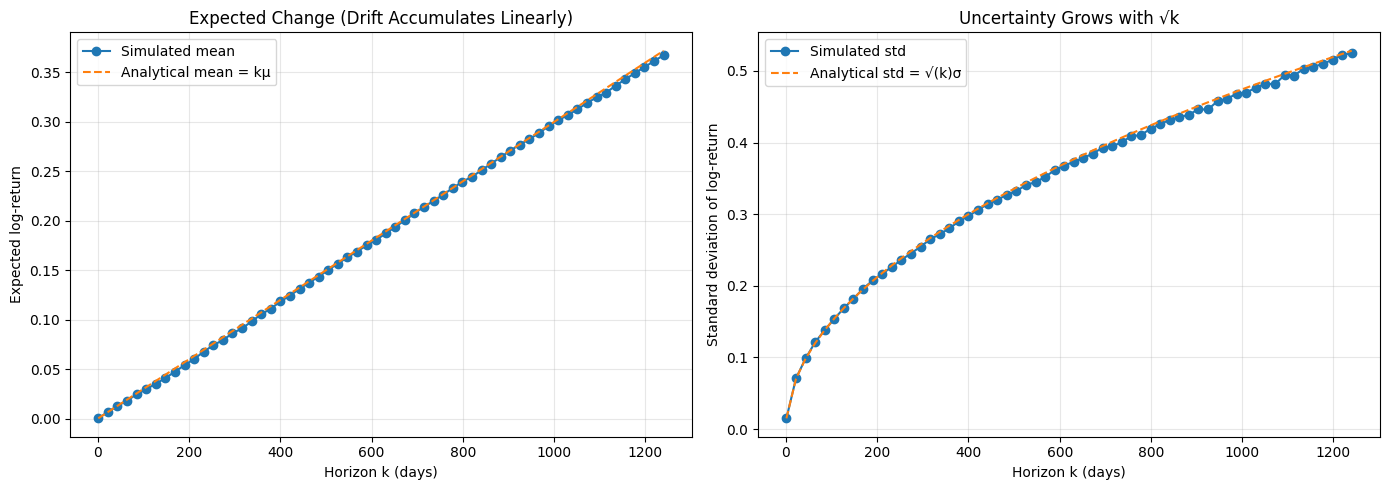

Lag-1 autocorrelation: -0.5261

Interpretation: Suggests mean-reversion (negative serial correlation (returns tend to reverse direction)).
Approximate standard error: 0.316  →  95% band: ±0.632
Result: The autocorrelation is not statistically significant with this sample size.



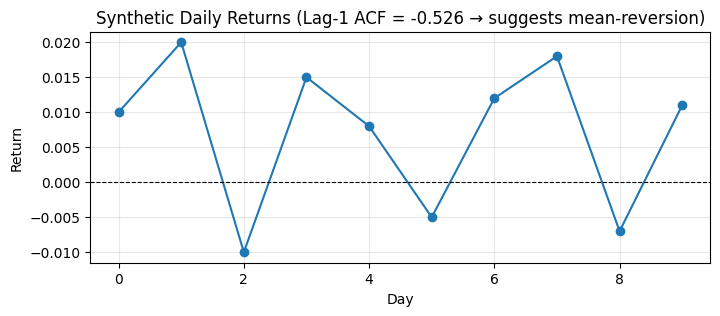

Lag 1: p-value = 0.0000
Lag 2: p-value = 0.0000
t-statistic          = +0.527
Standard error       = 0.00076
p-value              ≈ 0.5986

Critical |t| (10%)   ≈ ±1.651
Critical |t| (5%)    ≈ ±1.970
Critical |t| (1%)    ≈ ±2.596

Interpretation:
- |t| below all conventional thresholds → fail to reject H0 (consistent with zero mean excess return)

In EMH context:
- Failure to reject H0 supports the null that the observed mean is indistinguishable from zero
  after accounting for sampling variability — no statistically reliable edge.
- With only 250 observations, daily noise is high; longer samples or lower volatility
  are needed for the same mean to become significant.

Annualized excess return ≈ 10.6%
Annualized volatility    ≈ 19.0%
Implied Sharpe ratio     ≈ 0.56


/Users/matthewpavlovich/.pyenv/versions/3.11.11/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


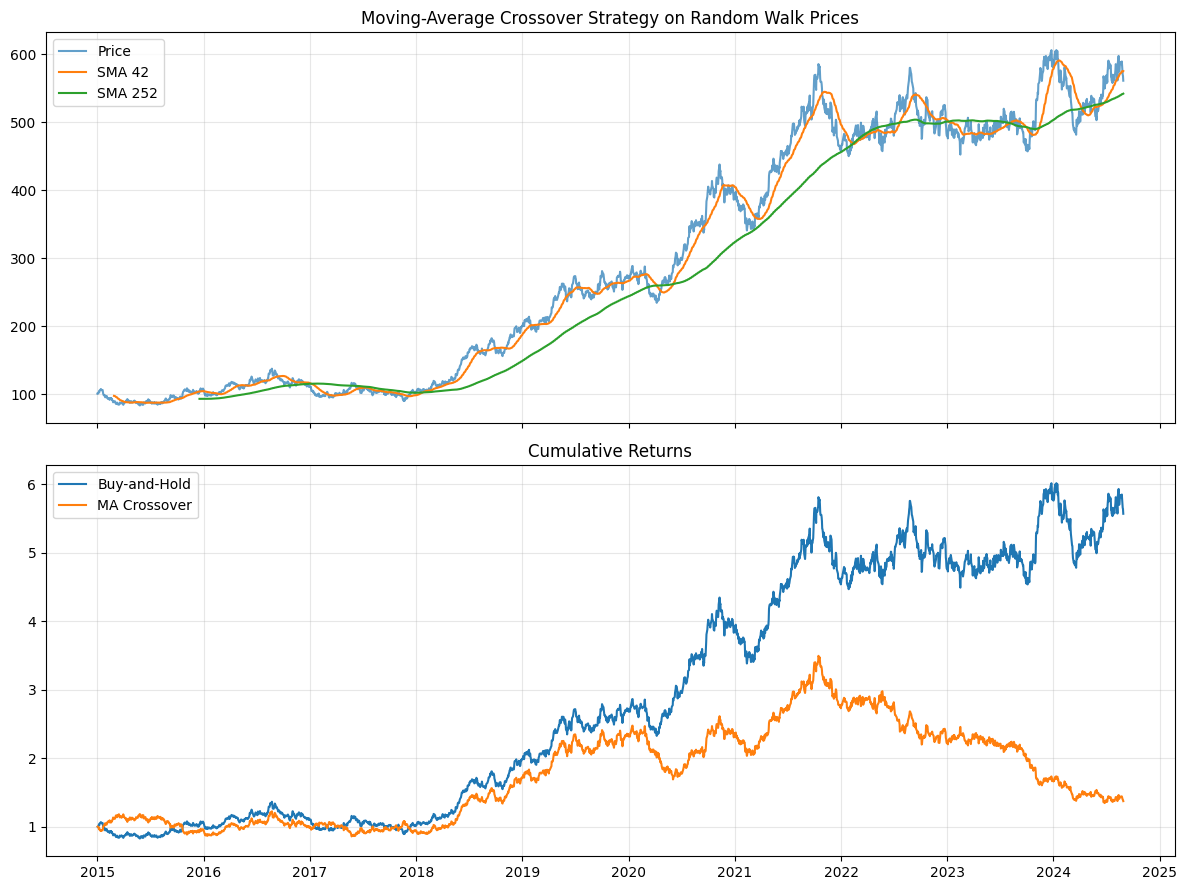

Backtest Diagnostics (10-year random walk simulation)
Strategy Sharpe      : 0.253
Buy-and-Hold Sharpe  : 0.851
Strategy Max DD      : -61.5%
Buy-and-Hold Max DD  : -34.6%


In [48]:
"""
Python & AI for Algorithmic Trading - Exercises (Part I / Efficient Markets Baseline)
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import t  # added for critical value
import pandas as pd

# =============================================================================
# Exercise 1
# Assume a log price follows pt = pt−1 + µ + εt with independent shocks.
# Derive the mean and variance of pt+k− pt and interpret what this says about
# predictability at horizon k.
# =============================================================================

def multi_horizon_stats(k, mu, sigma, n_sims=10000, seed=42):
    np.random.seed(seed)
    shocks = np.random.normal(loc=0, scale=sigma, size=(n_sims, k))
    horizon_returns = k * mu + shocks.sum(axis=1)
    return horizon_returns.mean(), horizon_returns.var()

mu_daily = 0.0003
sigma_daily = 0.015

ks = np.arange(1, 252*5 + 1, 21)
means = []
vars_ = []
for k in ks:
    m, v = multi_horizon_stats(k, mu_daily, sigma_daily)
    means.append(m)
    vars_.append(v)

analytical_means = ks * mu_daily
analytical_vars = ks * sigma_daily**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(ks, means, 'o-', label='Simulated mean')
ax1.plot(ks, analytical_means, '--', label='Analytical mean = kµ')
ax1.set_xlabel('Horizon k (days)')
ax1.set_ylabel('Expected log-return')
ax1.set_title('Expected Change (Drift Accumulates Linearly)')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(ks, np.sqrt(vars_), 'o-', label='Simulated std')
ax2.plot(ks, np.sqrt(analytical_vars), '--', label='Analytical std = √(k)σ')
ax2.set_xlabel('Horizon k (days)')
ax2.set_ylabel('Standard deviation of log-return')
ax2.set_title('Uncertainty Grows with √k')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretation:
# - Mean change grows linearly with k (deterministic drift component).
# - Variance grows linearly with k → standard deviation grows with √k.
# - Signal-to-noise ratio = (kµ) / (σ√k) = √k * (µ/σ).
# - If µ ≠ 0, predictability actually improves at longer horizons (higher t-statistic).
# - Under risk-adjusted EMH, µ ≈ 0 for excess returns → mean ≈ 0, no predictability at any k.

# =============================================================================
# Exercise 2
# Create a short synthetic return series (for example, ten daily returns you invent).
# Compute the lag-one sample autocorrelation and interpret whether it suggests
# momentum, mean-reversion, or noise.
# =============================================================================

np.random.seed(123)
returns = np.array([0.01, 0.02, -0.01, 0.015, 0.008, -0.005, 0.012, 0.018, -0.007, 0.011])

def lag_one_autocorr(r):
    return np.corrcoef(r[:-1], r[1:])[0, 1]

rho1 = lag_one_autocorr(returns)

# Dynamic interpretation based on lag-1 autocorrelation
if rho1 > 0.1:
    pattern = "momentum"
    description = "positive serial correlation (returns tend to persist in direction)"
elif rho1 < -0.1:
    pattern = "mean-reversion"
    description = "negative serial correlation (returns tend to reverse direction)"
else:
    pattern = "noise"
    description = "near-zero serial correlation (random, unpredictable behavior)"

# Rough statistical significance check (rule of thumb)
T = len(returns)
se = 1 / np.sqrt(T)  # Approximate standard error under null of no autocorrelation
significant = "statistically significant (approx. 95% level)" if abs(rho1) > 2 * se else "not statistically significant"

print(f"Lag-1 autocorrelation: {rho1:.4f}")
print(f"\nInterpretation: Suggests {pattern} ({description}).")
print(f"Approximate standard error: {se:.3f}  →  95% band: ±{2*se:.3f}")
print(f"Result: The autocorrelation is {significant} with this sample size.\n")

# Plot with interpretation in title
plt.figure(figsize=(8, 3))
plt.plot(returns, 'o-', color="#1f77b4")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title(f"Synthetic Daily Returns (Lag-1 ACF = {rho1:.3f} → suggests {pattern})")
plt.ylabel("Return")
plt.xlabel("Day")
plt.grid(True, alpha=0.3)
plt.show()

# =============================================================================
# Exercise 3
# Formulate a Granger-causality test between two time series Xt and Yt.
# Write the regressions you would estimate and state the null hypothesis in words.
# =============================================================================

def granger_test_example(max_lag=2):
    n = 200
    np.random.seed(42)
    X = np.random.normal(size=n)
    Y = 0.4 * X[:-1] + np.random.normal(size=n-1)
    X = X[1:]
    data = np.column_stack([Y, X])
    
    result = grangercausalitytests(data, maxlag=max_lag, verbose=False)
    return result

results = granger_test_example(max_lag=2)

for lag, res in results.items():
    print(f"Lag {lag}: p-value = {res[0]['ssr_ftest'][1]:.4f}")

# Null hypothesis: "The lagged values of X do not provide statistically significant information
# about future values of Y beyond the information already contained in lagged Y."

# =============================================================================
# Exercise 4
# You observe an average daily excess return of 0.04% with a daily standard deviation
# of 1.2% over 250 trading days. Compute the t-statistic for the mean and discuss
# whether it is distinguishable from zero under standard assumptions.
# =============================================================================

mean_daily = 0.0004      # 0.04%
std_daily = 0.012        # 1.2%
n = 250

se = std_daily / np.sqrt(n)
t_stat = mean_daily / se

# Critical values for two-tailed test (df = 249)
alpha_10 = 0.10
alpha_05 = 0.05
alpha_01 = 0.01

crit_10 = t.ppf(1 - alpha_10/2, df=n-1)
crit_05 = t.ppf(1 - alpha_05/2, df=n-1)
crit_01 = t.ppf(1 - alpha_01/2, df=n-1)

# p-value
p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=n-1))

print(f"t-statistic          = {t_stat:+.3f}")
print(f"Standard error       = {se:.5f}")
print(f"p-value              ≈ {p_value:.4f}")
print()
print(f"Critical |t| (10%)   ≈ ±{crit_10:.3f}")
print(f"Critical |t| (5%)    ≈ ±{crit_05:.3f}")
print(f"Critical |t| (1%)    ≈ ±{crit_01:.3f}")

# Interpretation with thresholds
print("\nInterpretation:")
if abs(t_stat) > crit_01:
    print("- |t| > critical value at 1% → strong evidence against H0 (mean excess return ≠ 0)")
elif abs(t_stat) > crit_05:
    print("- |t| > critical value at 5% → moderate evidence against H0")
elif abs(t_stat) > crit_10:
    print("- |t| > critical value at 10% → weak evidence against H0")
else:
    print("- |t| below all conventional thresholds → fail to reject H0 (consistent with zero mean excess return)")

print("\nIn EMH context:")
print("- Failure to reject H0 supports the null that the observed mean is indistinguishable from zero")
print("  after accounting for sampling variability — no statistically reliable edge.")
print("- With only 250 observations, daily noise is high; longer samples or lower volatility")
print("  are needed for the same mean to become significant.")

# Annualized context for intuition
annual_mean = (1 + mean_daily)**252 - 1
annual_vol = std_daily * np.sqrt(252)
annual_sr = annual_mean / annual_vol if annual_vol > 0 else 0

print(f"\nAnnualized excess return ≈ {annual_mean:.1%}")
print(f"Annualized volatility    ≈ {annual_vol:.1%}")
print(f"Implied Sharpe ratio     ≈ {annual_sr:.2f}")

# =============================================================================
# Exercise 5
# Choose a simple strategy idea (for example, moving-average crossovers).
# Sketch the data you would need, the features you would compute, the signal rule,
# and two diagnostics you would use to judge the backtest.
# =============================================================================

# Strategy choice: Dual moving-average crossover
# - Short SMA: 42 days (≈2 trading months)
# - Long SMA: 252 days (≈1 trading year)

# Data needed:
# - Daily adjusted close prices for a liquid asset.
# - Sufficient history (at least long window + out-of-sample period).
# - Ideally with estimates for transaction costs/slippage.

# Features computed:
# - sma_short = close.rolling(42).mean()
# - sma_long  = close.rolling(252).mean()

# Signal rule:
# - position_t = +1 (long)  if sma_short_t > sma_long_t
# - position_t = -1 (short) if sma_short_t < sma_long_t
# Position determined at close t, applied from t to t+1.

# Two diagnostics:
# 1. Equity curve comparison (strategy vs. buy-and-hold).
# 2. Risk-adjusted metrics: Annualized Sharpe ratio and maximum drawdown.

# Implementation on geometric random walk (EMH null)
np.random.seed(42)
n_days = 252 * 10  # 10 years
mu = 0.0003        # ~8% annual drift
sigma = 0.015      # ~24% annual vol
log_returns = np.random.normal(mu, sigma, n_days)
prices = 100 * np.cumprod(1 + log_returns)
dates = pd.date_range('2015-01-01', periods=n_days, freq='B')
df = pd.DataFrame({'close': prices}, index=dates)

short_window = 42
long_window = 252

df['sma_short'] = df['close'].rolling(short_window).mean()
df['sma_long']  = df['close'].rolling(long_window).mean()

df['signal'] = np.where(df['sma_short'] > df['sma_long'], 1, -1)
df['position'] = df['signal'].shift(1)

df['market_ret'] = df['close'].pct_change()
df['strategy_ret'] = df['position'] * df['market_ret']

df['cum_market'] = (1 + df['market_ret']).cumprod()
df['cum_strategy'] = (1 + df['strategy_ret']).cumprod()

# Metrics
def sharpe(returns, periods=252):
    return np.sqrt(periods) * returns.mean() / returns.std() if returns.std() != 0 else 0

def max_drawdown(cum_returns):
    roll_max = cum_returns.cummax()
    drawdown = cum_returns / roll_max - 1
    return drawdown.min()

strat_sharpe = sharpe(df['strategy_ret'].dropna())
market_sharpe = sharpe(df['market_ret'].dropna())
strat_mdd = max_drawdown(df['cum_strategy'])
market_mdd = max_drawdown(df['cum_market'])

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

ax1.plot(df['close'], label='Price', alpha=0.7)
ax1.plot(df['sma_short'], label=f'SMA {short_window}')
ax1.plot(df['sma_long'], label=f'SMA {long_window}')
ax1.set_title('Moving-Average Crossover Strategy on Random Walk Prices')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(df['cum_market'], label='Buy-and-Hold')
ax2.plot(df['cum_strategy'], label='MA Crossover')
ax2.set_title('Cumulative Returns')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Diagnostic summary
print("Backtest Diagnostics (10-year random walk simulation)")
print(f"Strategy Sharpe      : {strat_sharpe:.3f}")
print(f"Buy-and-Hold Sharpe  : {market_sharpe:.3f}")
print(f"Strategy Max DD      : {strat_mdd:.1%}")
print(f"Buy-and-Hold Max DD  : {market_mdd:.1%}")

# Interpretation under EMH baseline:
# - On pure random walk data, the strategy typically shows near-zero or negative Sharpe
#   and larger drawdowns due to whipsaws.
# - Consistent with no genuine edge.

In [49]:
"""
Python & AI for Algorithmic Trading - Advanced Exercises (Part I)
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats

# =============================================================================
# Advanced Exercise 1
# Explain how transaction costs and slippage change the statistical significance
# of a strategy. How would you incorporate realistic costs into the null hypothesis?
# =============================================================================

# Demonstration: impact of costs on t-statistic
np.random.seed(42)
n = 252 * 5
gross_ret = np.random.normal(0.0005, 0.015, n)  # gross daily mean 0.05%

# High-turnover strategy (~100% annual turnover → ~0.4 trades/day average)
turnover_per_day = 0.004
cost_per_turn = 0.0005  # 5 bps
daily_cost = cost_per_turn * turnover_per_day * 252 * 2
net_ret = gross_ret - daily_cost

t_gross = stats.ttest_1samp(gross_ret, 0).statistic
p_gross = stats.ttest_1samp(gross_ret, 0).pvalue
t_net   = stats.ttest_1samp(net_ret, 0).statistic
p_net   = stats.ttest_1samp(net_ret, 0).pvalue

print("Exercise 1 - Transaction Costs Impact")
print(f"Gross t-stat: {t_gross:+.3f} (p-value: {p_gross:.4f})")
print(f"Net t-stat  : {t_net:+.3f} (p-value: {p_net:.4f})")
print(f"Daily cost deduction: {daily_cost:.6f}")

# Interpretation based on results
print("\nInterpretation:")
if p_gross < 0.05:
    print("- Gross returns appear statistically significant (reject H0 at 5%).")
else:
    print("- Gross returns are not statistically significant.")
if p_net < 0.05:
    print("- After realistic costs, significance is retained → potential genuine edge.")
else:
    print("- After realistic costs, we fail to reject H0 → costs eliminate apparent edge.")
print("- Relevance: Even modest turnover can turn marginal gross alpha into zero/negative net.")
print("  Under a cost-adjusted null (net excess return = 0), many published strategies fail.")

# =============================================================================
# Advanced Exercise 2
# Compare a random-walk model with an autoregressive (AR) model of order one.
# Which parameter have values imply predictability, and how would you test whether
# they are materially different from zero?
# =============================================================================

np.random.seed(42)
n = 1000
phi_true = 0.05  # mild momentum for demonstration

returns = np.zeros(n)
returns[0] = np.random.normal(0, 0.01)
for t in range(1, n):
    returns[t] = phi_true * returns[t-1] + np.random.normal(0, 0.01)

model = ARIMA(returns, order=(1, 0, 0)).fit()

phi_est = model.params[1]
phi_p = model.pvalues[1]
phi_se = model.bse[1]

print("\nExercise 2 - AR(1) Model Fit")
print(f"Estimated φ: {phi_est:.4f} (SE: {phi_se:.4f}, p-value: {phi_p:.4f})")

# Interpretation based on test result
print("\nInterpretation:")
if phi_p < 0.05 and abs(phi_est) > 0.02:  # material threshold example
    if phi_est > 0:
        print("- φ significantly positive → evidence of momentum-based predictability.")
    else:
        print("- φ significantly negative → evidence of mean reversion.")
    print("  Rejection of random-walk null; potential exploitable serial correlation.")
else:
    print("- φ not significantly different from 0.")
    print("  Consistent with random walk / weak-form efficiency.")
    print("  No reliable evidence of return predictability from past returns.")

# =============================================================================
# Advanced Exercise 3
# Discuss the risk of data snooping and multiple testing in strategy research.
# Propose a workflow that reduces false discoveries while still allowing model exploration.
# =============================================================================

# Example: 20 independent strategy variants tested on same data
np.random.seed(100)
p_values = np.random.uniform(0, 1, 20)
p_values[0] = 0.003  # one "significant" by chance + one true

alpha = 0.05
raw_significant = np.sum(p_values < alpha)
bonferroni_alpha = alpha / len(p_values)
bonf_significant = np.sum(p_values < bonferroni_alpha)

print("\nExercise 3 - Multiple Testing Example")
print(f"Raw α=0.05: {raw_significant} / {len(p_values)} tests significant")
print(f"Bonferroni-adjusted α={bonferroni_alpha:.4f}: {bonf_significant} significant")

# Interpretation
print("\nInterpretation:")
print("- Without correction, expect ~1 false positive by chance in 20 tests.")
if raw_significant > 1:
    print("- High raw count suggests data-snooping risk; many could be spurious.")
if bonf_significant == 0:
    print("- After correction, no discoveries survive → protects against false positives.")
else:
    print("- Some survive correction → stronger evidence, but still require OOS validation.")
print("- Relevance: Unadjusted testing inflates Type I errors,")
print("  leading to overconfidence in non-existent edges under EMH.")

# =============================================================================
# Advanced Exercise 4
# The chapter frames efficiency as a function of the information set, search
# technology, and model class. Provide a concrete example of how a new data
# source or model family could shift the efficiency baseline.
# =============================================================================

print("\nExercise 4 - Example Summary")
print("Example: Alternative data + modern NLP (e.g., earnings call transcripts)")
print("- Pre-2018: Transcripts public but tone/language hard to quantify at scale.")
print("- Post-BERT/LLM: New model family extracts sentiment, confidence, forward guidance.")
print("- Result: Temporary inefficiency → early adopters earn alpha on earnings surprises.")
print("- Over time: Widespread adoption enlarges effective information set,")
print("  edge decays, market re-efficient relative to new technology baseline.")
print("- Relevance: Efficiency is not absolute; innovation can create exploitable")
print("  windows until competition arbitrages them away.")

Exercise 1 - Transaction Costs Impact
Gross t-stat: +2.563 (p-value: 0.0105)
Net t-stat  : +0.153 (p-value: 0.8788)
Daily cost deduction: 0.001008

Interpretation:
- Gross returns appear statistically significant (reject H0 at 5%).
- After realistic costs, we fail to reject H0 → costs eliminate apparent edge.
- Relevance: Even modest turnover can turn marginal gross alpha into zero/negative net.
  Under a cost-adjusted null (net excess return = 0), many published strategies fail.

Exercise 2 - AR(1) Model Fit
Estimated φ: 0.0426 (SE: 0.0324, p-value: 0.1884)

Interpretation:
- φ not significantly different from 0.
  Consistent with random walk / weak-form efficiency.
  No reliable evidence of return predictability from past returns.

Exercise 3 - Multiple Testing Example
Raw α=0.05: 2 / 20 tests significant
Bonferroni-adjusted α=0.0025: 0 significant

Interpretation:
- Without correction, expect ~1 false positive by chance in 20 tests.
- High raw count suggests data-snooping risk; many

Fetching MTUM daily data via yfinance (auto_adjust=True)...
Data shape: 3226 trading days (2013-04-19 to 2026-02-13)

Lag-1 autocorrelation (log returns): -0.08069 (SE ≈ 0.01761)
One-sided p-value (momentum): 1.0000
One-sided p-value (reversion): 1.0000
Two-sided p-value (random walk null): 2.0000

=== Gross Performance ===
Buy-and-Hold  – Ann ret: 13.7%, Sharpe: 0.699, Max DD: -34.1%
Momentum      – Ann ret: -5.9%, Sharpe: -0.300, Max DD: -64.9%
Reversion     – Ann ret: 5.9%, Sharpe: 0.300, Max DD: -29.6%

Distribution Diagnostics
Skew: -0.536, Excess Kurtosis: 11.128, Jarque-Bera p: 0.0000

Cost Sensitivity
   Costs (bps/turn)  Momentum Sharpe  Reversion Sharpe
0                 0           -0.300             0.300
1                 1           -0.430             0.171
2                 3           -0.688            -0.088
3                 5           -0.946            -0.347
4                10           -1.588            -0.991


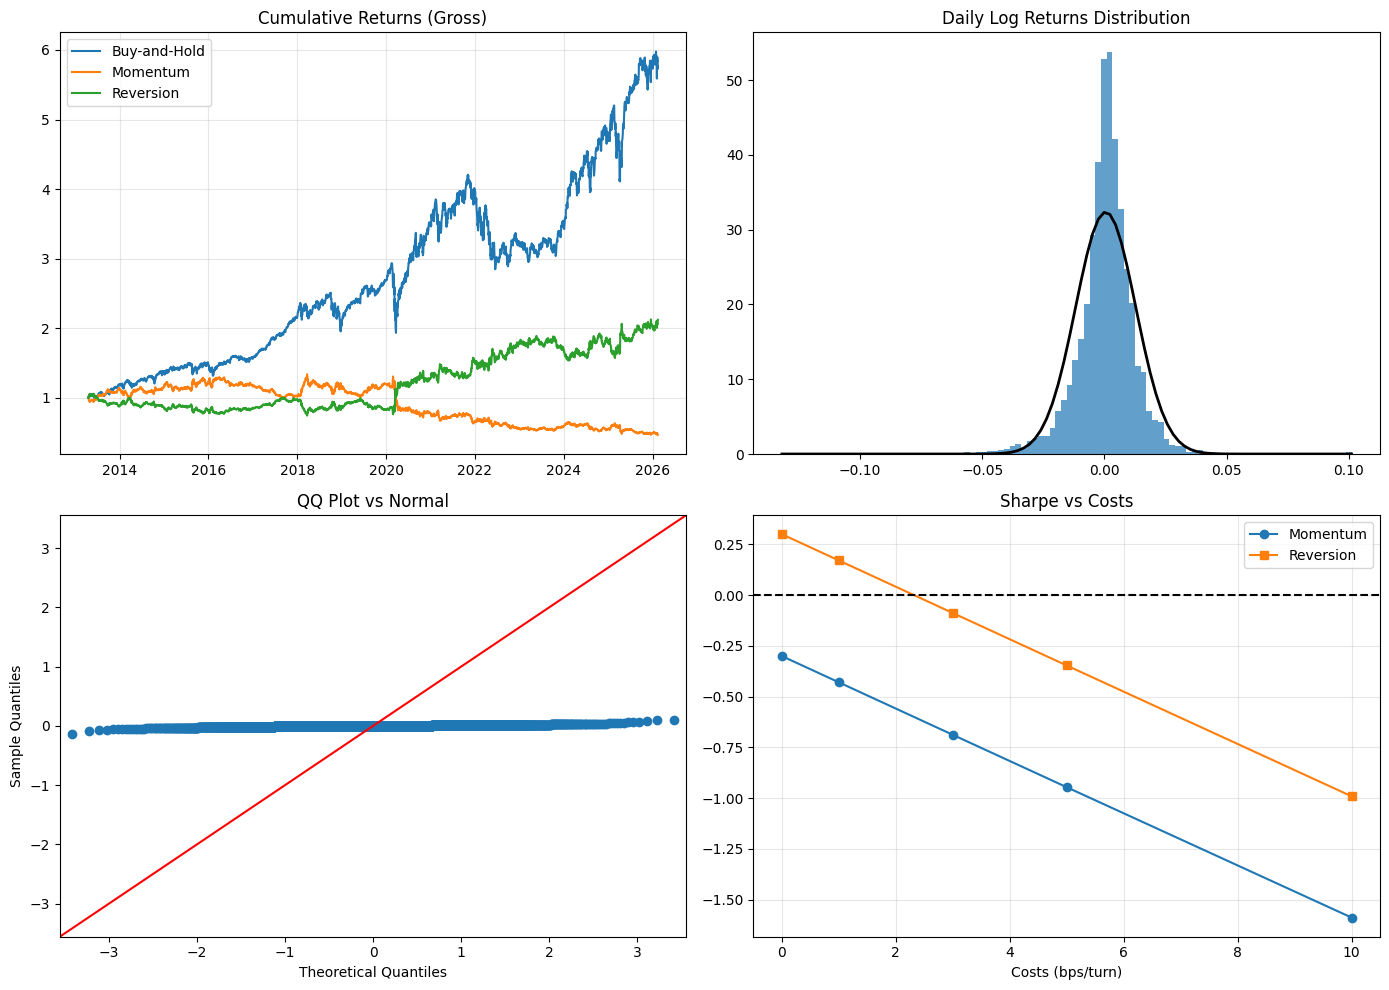


=== EMH Baseline Diagnostic – Automated Recommendation ===
Autocorrelation ρ₁          : -0.08069 (material)
Two-sided p-value           : 2.0000 → consistent with random walk
Best gross Sharpe           : 0.300
Best net Sharpe (5 bps)     : -0.347

Quantitative Assessment:
→ Multiple abandon conditions triggered.
Recommendation: ABANDON further pursuit for short-term predictability in this asset.
  Results align with weak-form efficiency baseline.


In [50]:
"""
Python & AI for Algorithmic Trading - Capstone Project (Part I)

Companct EMH diagnostic tool
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats
import statsmodels.api as sm

# =============================================================================
# Part 1: Asset selection, frequency, period, and data filters
# =============================================================================

print("Fetching MTUM daily data via yfinance (auto_adjust=True)...")
df = yf.download('MTUM', start='2010-01-01', auto_adjust=True, progress=False)

if 'Close' not in df.columns:
    raise ValueError(f"Expected 'Close' column not found. Columns: {df.columns.tolist()}")

df = df[['Close']].copy()
df.rename(columns={'Close': 'close'}, inplace=True)
df = df.dropna()

df['simple_ret'] = df['close'].pct_change()
df['log_ret'] = np.log(df['close'] / df['close'].shift(1))
df = df.dropna()

print(f"Data shape: {df.shape[0]} trading days ({df.index[0].date()} to {df.index[-1].date()})")

# =============================================================================
# Part 2: Competing predictability hypotheses + tests
# =============================================================================

def lag1_acf(returns):
    rho = np.corrcoef(returns[:-1], returns[1:])[0, 1]
    se = 1 / np.sqrt(len(returns))
    return rho, se

rho, se = lag1_acf(df['log_ret'])
z_mom = rho / se
z_rev = -rho / se
p_mom = 1 - stats.norm.cdf(z_mom)
p_rev = stats.norm.cdf(z_rev)
p_two_sided = 2 * min(p_mom, p_rev)

print(f"\nLag-1 autocorrelation (log returns): {rho:.5f} (SE ≈ {se:.5f})")
print(f"One-sided p-value (momentum): {p_mom:.4f}")
print(f"One-sided p-value (reversion): {p_rev:.4f}")
print(f"Two-sided p-value (random walk null): {p_two_sided:.4f}")

# Simple sign strategies
df['mom_signal'] = np.where(df['log_ret'].shift(1) > 0, 1, -1)
df['mom_ret'] = df['mom_signal'] * df['log_ret']

df['rev_signal'] = -df['mom_signal']
df['rev_ret'] = df['rev_signal'] * df['log_ret']

df['bh_ret'] = df['log_ret']

# =============================================================================
# Part 3: Evaluation report
# =============================================================================

def annualize(ret_series, periods=252):
    mean = ret_series.mean() * periods
    vol = ret_series.std() * np.sqrt(periods)
    sharpe = mean / vol if vol > 0 else 0
    return mean, vol, sharpe

def max_drawdown(log_ret_series):
    cum = np.exp(np.cumsum(log_ret_series))
    roll_max = np.maximum.accumulate(cum)
    dd = cum / roll_max - 1
    return dd.min()

ann_mean_mom, ann_vol_mom, sharpe_mom = annualize(df['mom_ret'])
ann_mean_rev, ann_vol_rev, sharpe_rev = annualize(df['rev_ret'])
ann_mean_bh, ann_vol_bh, sharpe_bh = annualize(df['bh_ret'])

mdd_mom = max_drawdown(df['mom_ret'])
mdd_rev = max_drawdown(df['rev_ret'])
mdd_bh = max_drawdown(df['bh_ret'])

skew = stats.skew(df['log_ret'])
kurt = stats.kurtosis(df['log_ret'])
jb_stat, jb_p = stats.jarque_bera(df['log_ret'])

# Cost sensitivity
cost_levels_bps = [0, 1, 3, 5, 10]
results = []
for bps in cost_levels_bps:
    cost = bps / 10000
    mom_net = df['mom_ret'] - cost * np.abs(df['mom_signal'].diff().fillna(0))
    rev_net = df['rev_ret'] - cost * np.abs(df['rev_signal'].diff().fillna(0))
    
    _, _, sharpe_mom_net = annualize(mom_net)
    _, _, sharpe_rev_net = annualize(rev_net)
    
    results.append({
        'Costs (bps/turn)': bps,
        'Momentum Sharpe': sharpe_mom_net,
        'Reversion Sharpe': sharpe_rev_net
    })

cost_df = pd.DataFrame(results)

# Extract net Sharpe at 5 bps
mom_net_5 = cost_df.loc[cost_df['Costs (bps/turn)'] == 5, 'Momentum Sharpe'].item()
rev_net_5 = cost_df.loc[cost_df['Costs (bps/turn)'] == 5, 'Reversion Sharpe'].item()
best_net_5 = max(mom_net_5, rev_net_5)

print("\n=== Gross Performance ===")
print(f"Buy-and-Hold  – Ann ret: {ann_mean_bh:.1%}, Sharpe: {sharpe_bh:.3f}, Max DD: {mdd_bh:.1%}")
print(f"Momentum      – Ann ret: {ann_mean_mom:.1%}, Sharpe: {sharpe_mom:.3f}, Max DD: {mdd_mom:.1%}")
print(f"Reversion     – Ann ret: {ann_mean_rev:.1%}, Sharpe: {sharpe_rev:.3f}, Max DD: {mdd_rev:.1%}")

print("\nDistribution Diagnostics")
print(f"Skew: {skew:.3f}, Excess Kurtosis: {kurt:.3f}, Jarque-Bera p: {jb_p:.4f}")

print("\nCost Sensitivity")
print(cost_df.round(3))

# Plots (unchanged)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
cum_bh = np.exp(df['bh_ret'].cumsum())
cum_mom = np.exp(df['mom_ret'].cumsum())
cum_rev = np.exp(df['rev_ret'].cumsum())

axes[0,0].plot(cum_bh, label='Buy-and-Hold')
axes[0,0].plot(cum_mom, label='Momentum')
axes[0,0].plot(cum_rev, label='Reversion')
axes[0,0].set_title('Cumulative Returns (Gross)')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

axes[0,1].hist(df['log_ret'], bins=100, density=True, alpha=0.7)
x = np.linspace(df['log_ret'].min(), df['log_ret'].max(), 100)
axes[0,1].plot(x, stats.norm.pdf(x, df['log_ret'].mean(), df['log_ret'].std()), 'k', lw=2)
axes[0,1].set_title('Daily Log Returns Distribution')

sm.qqplot(df['log_ret'], line='45', ax=axes[1,0])
axes[1,0].set_title('QQ Plot vs Normal')

axes[1,1].plot(cost_df['Costs (bps/turn)'], cost_df['Momentum Sharpe'], 'o-', label='Momentum')
axes[1,1].plot(cost_df['Costs (bps/turn)'], cost_df['Reversion Sharpe'], 's-', label='Reversion')
axes[1,1].axhline(0, color='black', linestyle='--')
axes[1,1].set_title('Sharpe vs Costs')
axes[1,1].set_xlabel('Costs (bps/turn)')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# Part 4: Dynamic recommendation based on results
# =============================================================================

print("\n=== EMH Baseline Diagnostic – Automated Recommendation ===")

# Quantitative flags
clear_rejection = p_two_sided < 0.05 and (p_mom < 0.05 or p_rev < 0.05)
material_rho = abs(rho) >= 0.02
gross_respectable = max(sharpe_mom, sharpe_rev) >= 0.3
net_positive = best_net_5 > 0
net_strong = best_net_5 > 0.4

# Direction if any
if clear_rejection:
    direction = "short-term momentum" if p_mom < 0.05 else "short-term mean reversion"

print(f"Autocorrelation ρ₁          : {rho:+.5f} ({'material' if material_rho else 'trivial'})")
print(f"Two-sided p-value           : {p_two_sided:.4f} → {'reject random walk' if p_two_sided < 0.05 else 'consistent with random walk'}")
if clear_rejection:
    print(f"Directional evidence        : {'significant ' + direction}")
print(f"Best gross Sharpe           : {max(sharpe_mom, sharpe_rev):.3f}")
print(f"Best net Sharpe (5 bps)     : {best_net_5:.3f}")

print("\nQuantitative Assessment:")
if clear_rejection and net_strong:
    print("→ All strict quantitative thresholds MET.")
    print("Recommendation: PROGRESS to detailed strategy development.")
    print("  Strong evidence against EMH null with robust net performance.")
    print("  Next: verify sub-period robustness, parameter stability, and economic rationale.")
elif p_two_sided > 0.10 or (not material_rho and not gross_respectable and not net_positive):
    print("→ Multiple abandon conditions triggered.")
    print("Recommendation: ABANDON further pursuit for short-term predictability in this asset.")
    print("  Results align with weak-form efficiency baseline.")
else:
    print("→ Mixed/inconclusive signals.")
    print("Recommendation: CAUTIOUS REVIEW.")
    print("  Marginal evidence at best; likely noise. Consider longer horizons or alternative features.")


In [51]:
"""
Python & AI for Algorithmic Trading - Interview-Style Questions (Part I)
"""

# =============================================================================
# Q1:
# Explain why treating EMH as a baseline is useful even for someone who wants to trade
# actively.
# =============================================================================

# Treating the Efficient Market Hypothesis (EMH) as a baseline is valuable because it
# establishes a disciplined null model: assume no predictable edge exists until proven
# otherwise with rigorous evidence.
#
# For an active trader, this approach:
# - Forces explicit falsification of the null through out-of-sample tests, cost-adjusted
#   performance, and robustness checks — preventing pursuit of spurious patterns.
# - Promotes risk control and realistic expectations, reducing over-leverage and
#   psychological pitfalls common in retail trading.
# - Encourages focus on genuine anomalies (if any) rather than over-optimistic data mining.
# - Remains compatible with active trading: temporary inefficiencies can exist, but the
#   baseline ensures only high-conviction, economically plausible ideas are pursued.
#
# In short: it turns trading into structured hypothesis testing rather than gambling
# on unproven ideas.

# =============================================================================
# Q2:
# How do you distinguish statistical predictability from a tradable edge?
# Mention costs, capacity, and stability.
# =============================================================================

# Statistical predictability (e.g., non-zero autocorrelation, significant regression
# coefficient) is necessary but insufficient for a tradable edge.
#
# Key distinctions:
# - Transaction costs & slippage: A gross positive mean may vanish after realistic
#   frictions (e.g., 3–10 bps per turn for equities). High-turnover signals are especially
#   vulnerable.
# - Capacity: The edge must absorb meaningful capital without adverse price impact.
#   Low-liquidity or microstructure-based signals often scale poorly.
# - Stability: Performance must persist out-of-sample, across regimes, and over time.
#   In-sample significance often decays due to competition or changing market dynamics.
#
# A tradable edge requires positive net risk-adjusted returns after these frictions,
# deployable at target position size, and robust beyond the discovery period.

# =============================================================================
# Q3:
# What does Granger causality mean in practice, and why does it not imply true
# economic causation?
# =============================================================================

# In practice, Granger causality tests whether lagged values of series X improve the
# forecast of series Y beyond what lagged Y alone provides (via comparing restricted
# and unrestricted regressions; F-test on added coefficients).
#
# It is a statistical precedence test: "X Granger-causes Y" means past X contains
# information useful for predicting Y.
#
# It does not imply true economic causation because:
# - Omitted variables: A third factor Z may drive both X and Y.
# - Spurious correlation from common trends or non-stationarity.
# - Reverse or bidirectional causality possible.
# - Timing artifacts: precedence ≠ mechanism.
#
# Classic reminder: "correlation is not causation" — Granger is incremental prediction,
# not proof of directional influence.

# =============================================================================
# Q4:
# Describe a few safeguards you would use to avoid false discoveries when testing
# many strategy ideas.
# =============================================================================

# To mitigate data snooping and multiple-testing bias:
# - Chronological splits: strict in-sample / validation / hold-out periods; no peeking.
# - Walk-forward optimisation: optimise on rolling windows, test immediately forward.
# - Multiple-testing correction: Bonferroni or Holm adjustment on families of related tests.
# - Require economic magnitude: e.g., |effect| above noise threshold, not just p < 0.05.
# - Out-of-sample & cross-asset validation: performance must hold on unseen data and
#   related instruments.
# - Pre-commitment: document hypotheses before testing where possible.
# - Synthetic controls: compare against randomised data to benchmark significance.
#
# Combined, these raise the evidence bar, aligning with EMH skepticism.

'\nPython & AI for Algorithmic Trading - Interview-Style Questions (Part I)\n'